# Embedding's для MovieLens 27M датасета

## Описание задачи

Необходимо построить векторное представление пользователей и фильмов используя нейросетевые подходы, чтобы можно было по эмбендингу пользователя искать похожие эмбендинги фильмов и рекомендовать ему их.

Обратить внимание на:

1. Какие данных на обучение и валидацию, обоснование.
2. Выбор и обоснование метрики
3. Разработка архитектуры нейронной сети с пояснением
4. Обучение и валидация
5. Решение должно быть воспроизводимым с подробными комментариями на каждом шаге

## Описание данных

*Полный* датасет MovieLens с сайта grouplens.org: https://files.grouplens.org/datasets/movielens/ml-latest.zip

В датасете содержится информация о фильмах, оценках пользователей и тегах фильмов.


Структура файла данных рейтингов (ratings.csv)
-----------------------------------------

Все рейтинги содержатся в файле `ratings.csv`. Каждая строка этого файла после строки заголовка представляет собой одну оценку одного фильма одним пользователем и имеет следующий формат:

    userId,movieId,rating,timestamp

Строки в этом файле упорядочены сначала по идентификатору пользователя, затем, внутри пользователя, по идентификатору фильма.

Оценки выставляются по 5-звездочной шкале, с шагом в ползвезды (0,5 звезды - 5,0 звезды).

Временные метки представляют собой секунды с полуночи по всемирному координированному времени (UTC) от 1 января 1970 года.


Структура файла данных тегов (tags.csv)
-----------------------------------

Все теги содержатся в файле `tags.csv`. Каждая строка этого файла после строки заголовка представляет собой один тег, примененный к одному фильму одним пользователем, и имеет следующий формат:

    userId,movieId,tag,timestamp

Строки в этом файле упорядочены сначала по userId, затем, внутри пользователя, по movieId.

Теги - это созданные пользователем метаданные о фильмах. Каждый тег обычно представляет собой одно слово или короткую фразу. Смысл, значение и цель конкретного тега определяется каждым пользователем.

Временные метки представляют собой секунды с полуночи по всемирному координированному времени (UTC) от 1 января 1970 года.


Структура файла данных фильмов (movies.csv)
---------------------------------------

Информация о фильмах содержится в файле `movies.csv`. Каждая строка этого файла после строки заголовка представляет один фильм и имеет следующий формат:

    movieId,title,genres

Названия фильмов вводятся вручную или импортируются из <https://www.themoviedb.org/> и включают год выпуска в круглых скобках. В этих названиях могут быть ошибки и несоответствия.

Жанры представляют собой список, разделенный трубкой, и выбираются из следующих:

* боевик
* Приключения
* Анимация
* Детские
* Комедия
* Криминал
* Документальный
* Драма
* Фэнтези
* Фильм-нуар
* Ужасы
* Мюзикл
* Мистерия
* Романтика
* Научная фантастика
* Триллер
* Война
* Вестерн
* (жанры не указаны)


Структура файла данных ссылок (links.csv)
---------------------------------------

Идентификаторы, которые могут быть использованы для ссылок на другие источники данных о фильмах, содержатся в файле `links.csv`. Каждая строка этого файла после строки заголовка представляет один фильм и имеет следующий формат:

    movieId,imdbId,tmdbId

movieId - это идентификатор для фильмов, используемых <https://movielens.org>. Например, фильм "История игрушек" имеет ссылку <https://movielens.org/movies/1>.

imdbId - это идентификатор для фильмов, используемых <http://www.imdb.com>. Например, фильм "История игрушек" имеет ссылку <http://www.imdb.com/title/tt0114709/>.

tmdbId - идентификатор для фильмов, используемых <https://www.themoviedb.org>. Например, фильм "История игрушек" имеет ссылку <https://www.themoviedb.org/movie/862>.

Использование перечисленных выше ресурсов регулируется условиями каждого поставщика.


Геном тегов (genome-scores.csv и genome-tags.csv)
-------------------------------------------------

Этот набор данных включает текущую копию генома тегов.

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Геном тегов - это структура данных, которая содержит оценки релевантности тегов для фильмов.  Структура представляет собой плотную матрицу: каждый фильм в геноме имеет значение для *каждого* тега в геноме.

Как описано в [этой статье][genome-paper], геном тегов кодирует, насколько сильно фильмы проявляют определенные свойства, представленные тегами (атмосферность, заставляющие задуматься, реалистичность и т.д.). Геном тегов был вычислен с помощью алгоритма машинного обучения на пользовательском контенте, включая теги, рейтинги и текстовые рецензии.

Геном разделен на два файла.  Файл `genome-scores.csv` содержит данные о релевантности тегов фильма в следующем формате:

    movieId,tagId,relevance

Второй файл, `genome-tags.csv`, содержит описания тегов для идентификаторов тегов в файле генома в следующем формате:

    tagId,tag

Значения `tagId` генерируются при экспорте набора данных, поэтому они могут отличаться в разных версиях наборов данных MovieLens.

При ссылке на геномные данные тегов, пожалуйста, указывайте следующую цитату:

> Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Кодирование знаний сообщества для поддержки новых взаимодействий. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1-13:44. <https://doi.org/10.1145/2362394.2362395>

## Анализ данных

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt

from keras.layers import Dense , Dot, Dropout, Flatten, Input, Embedding
from keras.optimizers import Adam
from keras.models import Model

from sklearn.metrics import mean_squared_error

import requests
from io import BytesIO
from zipfile import ZipFile

Сделаем превечный осмотр данных

In [109]:
try:
    df = pd.read_csv('ml-latest/ratings.csv')
except:
    path = 'https://files.grouplens.org/datasets/movielens/ml-latest.zip'
    with ZipFile(BytesIO(requests.get(path).content)) as z:
        with z.open('ml-latest/ratings.csv') as f:
            df = pd.read_csv(f)

In [ ]:
# make small dataset for testing
# df = df[:100_000]

In [110]:
df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [112]:
df = df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})

In [113]:
rating_pre_user = df.groupby('user_id')['rating'].count()
rating_pre_movie = df.groupby('movie_id')['rating'].count()

print(f'Количество пользователей: {len(rating_pre_user)}')
print(f'Количество фильмов: {len(rating_pre_movie)}')
print()

print(f'Максимальная оценка: {df["rating"].max()}')
print(f'Минимальная оценка: {df["rating"].min()}')
print(f'Медианная оценка: {df["rating"].median()}')
print(f'Количество оценок: {df["rating"].count()}')
print()

print(f'Максимальное количество оценок на пользователя: {rating_pre_user.max()}')
print(f'Минимальное количество оценок на пользователя: {rating_pre_user.min()}')
print(f'Медианное количество оценок на пользователя: {rating_pre_user.median()}')
print()

print(f'Максимальное количество оценок на фильм: {rating_pre_movie.max()}')
print(f'Минимальное количество оценок на фильм: {rating_pre_movie.min()}')
print(f'Медианное количество оценок на фильм: {rating_pre_movie.median()}')

del rating_pre_user, rating_pre_movie

Количество пользователей: 283228
Количество фильмов: 53889

Максимальная оценка: 5.0
Минимальная оценка: 0.5
Медианная оценка: 3.5
Количество оценок: 27753444

Максимальное количество оценок на пользователя: 23715
Минимальное количество оценок на пользователя: 1
Медианное количество оценок на пользователя: 30.0

Максимальное количество оценок на фильм: 97999
Минимальное количество оценок на фильм: 1
Медианное количество оценок на фильм: 7.0


Данный вывод дает основное представление о данных. Все кажется отличным, кроме id фильмов. Он не имеет такого же порядка, как у id пользователя. Нужно будет при обучении создавать собственный словарь для id, чтобы не было проблем с размерностью.

In [114]:
print(f'Максимальный ID пользователя: {df["user_id"].max()}')
print(f'Минимальный ID пользователя: {df["user_id"].min()} \n')

print(f'Максимальный ID фильма: {df["movie_id"].max()}')
print(f'Минимальный ID фильма: {df["movie_id"].min()} \n')

print(f'Кол-во уникальных ID пользователей: {df["user_id"].nunique()}')
print(f'Кол-во уникальных ID фильмов: {df["movie_id"].nunique()}')

Максимальный ID пользователя: 283228
Минимальный ID пользователя: 1 

Максимальный ID фильма: 193886
Минимальный ID фильма: 1 

Кол-во уникальных ID пользователей: 283228
Кол-во уникальных ID фильмов: 53889


Данный вывод, так же, подтверждает необходимость создания собственного словаря для id.

In [115]:
df.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [116]:
df.duplicated().sum()

0

В данных не обнаружено пропусков и дубликатов. Можно приступать к подготовке данных.

## Подготовка данных

In [117]:
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['movie_id'] = df['movie_id'].astype('category').cat.codes.values

In [118]:
df['user_id'].value_counts(ascending=True).head()

user_id
47251     1
5366      1
5364      1
32981     1
150426    1
Name: count, dtype: int64

In [119]:
users = df['user_id'].unique()
movies = df['movie_id'].unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

df['user_id'] = df['user_id'].apply(lambda x: userid2idx[x])
df['movie_id'] = df['movie_id'].apply(lambda x: movieid2idx[x])

Как я и говорил, создадим собственный словарь для id и перезапишем id в датасете. Так мы можем быть уверены, что размерность данных будет соответствовать размерности векторов.

Нужно произвести разделение данных на обучающую и тестовую выборки. Для этого воспользуемся функцией из статьи [Сравнение матричной факторизации с трансформерами на наборе данных MovieLens с применением библиотеки pytorch-acceleratd](https://habr.com/ru/companies/wunderfund/articles/645921/).

Данные функции не позволят допустить утечки данных в тестовую выборку. И оценка качества модели будет более объективной.

In [120]:
def get_last_n_ratings_by_user(
        df, n, min_ratings_per_user=1, user_colname="user_id", timestamp_colname="timestamp"
):
    return (
        df.groupby(user_colname)
        .filter(lambda x: len(x) >= min_ratings_per_user)
        .sort_values(timestamp_colname)
        .groupby(user_colname)
        .tail(n)
        .sort_values(user_colname)
    )

In [121]:
def mark_last_n_ratings_as_validation_set(
        df, n, min_ratings=1, user_colname="user_id", timestamp_colname="timestamp"
):
    """
    Отмечает n последних по времени оценок, что включает их в проверочную выборку.
    Делается это путём добавления дополнительного столбца 'is_valid' в df.
    :param df: объект DataFrame, содержащий оценки, данные пользователем
    :param n: количество оценок, которые надо включить в проверочную выборку
    :param min_ratings: включать лишь пользователей, имеющих более этого количества оценок
    :param user_id_colname: имя столбца, содержащего идентификатор пользователя
    :param timestamp_colname: имя столбца, содержащего отметку времени
    :return: тот же df, в который добавлен дополнительный столбец 'is_valid'
    """
    df["is_valid"] = False
    df.loc[
        get_last_n_ratings_by_user(
            df,
            n,
            min_ratings,
            user_colname=user_colname,
            timestamp_colname=timestamp_colname,
        ).index,
        "is_valid",
    ] = True
    return df

In [134]:
mark_last_n_ratings_as_validation_set(df, n=10, min_ratings=10);

In [135]:
train_df = df[df['is_valid'] == False].drop(columns=['is_valid'])
test_df = df[df['is_valid'] == True].drop(columns=['is_valid'])

Применяем функции для разделения данных на обучающую и тестовую выборки. Мы берем 8 последних оценок пользователя у которого оценено больше 20 фильмов и помечаем их как тестовые. И на основе этих пометок создаем два датасета `train_df` и `test_df`.

In [136]:
# show ratio of train and test data
print(f'Количество строк в тренировочном датасете: {len(train_df)}')
print(f'Количество строк в тестовом датасете: {len(test_df)}')
print(f'{len(df) / len(test_df):.2f}% тестового датасета')

Количество строк в тренировочном датасете: 25316864
Количество строк в тестовом датасете: 2436580
11.39% тестового датасета


Примерное соотношение 90:10. Почти, 10% данных будет достаточно для тестирования модели. Произведем разделение данных на обучающую и валидационную выборки, по такому же принципу.

In [143]:
df_train = mark_last_n_ratings_as_validation_set(train_df, n=5, min_ratings=5)

In [144]:
train = df_train[df_train['is_valid'] == False].drop(columns=['is_valid'])
valid = df_train[df_train['is_valid'] == True].drop(columns=['is_valid'])

del df_train

In [145]:
# show ratio of train and test data
print(f'Количество строк в тренировочном датасете: {len(train)}')
print(f'Количество строк в проверочном датасете: {len(valid)}')
print(f'{len(train_df) / len(valid):.2f}% тестового датасета')

Количество строк в тренировочном датасете: 24090579
Количество строк в проверочном датасете: 1226285
20.65% тестового датасета


Примерное соотношение 80:20. Почти, 20% данных будет достаточно для валидации модели. Можно переходить к обучению моделей.

In [147]:
del train_df

In [148]:
train.head()

,user_id,movie_id,rating,timestamp
14,0,14,2.0,1256677210
41,2,41,4.0,945141407
42,3,42,4.0,1113765937
43,3,43,4.0,1113767306
44,3,44,2.0,1123990453


## Построение модели


Модель:
- Будем использовать стандартный подход создания эмбеддингов для `users` и `items` - Low Rank Matrix Factorization. Но мы так же добавим прореживание и один слой с 96 нейронами. На выходе будет один нейрон, который будет выдавать оценку фильма. В обоих слоях будем использовать `relu` функцию активации.

Метрика:
- Для обучения модели была выбрана метрика `MSE` (Mean Squared Error). MSE обычно используется в рекомендательных системах на основе матричной факторизации, поскольку он является гладким, дифференцируемым, хорошо понятным и может быть оптимизирован с помощью градиентных методов. Он также эффективен для предотвращения чрезмерной подгонки и может быть настроен для достижения хорошей производительности.

In [ ]:
n_movies = len(df['movie_id'].unique())
n_users = len(df['user_id'].unique())

n_latent_factors = 50
dropout_rate = 0.4

In [150]:
user_input = Input(shape=(1,), name='user_input', dtype='int64')
user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)
user_vec = Flatten(name='FlattenUsers')(user_embedding)
user_vec = Dropout(dropout_rate)(user_vec)

In [151]:
movie_input = Input(shape=(1,), name='movie_input', dtype='int64')
movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = Dropout(dropout_rate)(movie_vec)

In [152]:
sim = Dot(name='Similarity', axes=1)([user_vec, movie_vec])

In [153]:
nn_inp = Dense(96, activation='relu')(sim)
nn_inp = Dropout(dropout_rate)(nn_inp)
nn_inp = Dense(1, activation='relu')(nn_inp)
nn_model = Model([user_input, movie_input], nn_inp)
nn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        14161400    ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        2694450     ['movie_input[0][0]']            
                                                                                            

Как и писалось выше, создаем модель, используя keras. В качестве входных данных будут `user_id` и `movie_id`. Для каждого из них создаем эмбеддинги с `latent factors` 50. Далее применяем `Dropout` для регуляризации. Далее применяем `Dot` для получения скалярного произведения эмбеддингов. Далее применяем `Dense` слой с 96 нейронами и функцией активации `relu`. Далее применяем `Dropout` для регуляризации. Далее применяем `Dense` слой с 1 нейроном и функцией активации `relu`. И выводим модель на экран. Все создалось успешно. Можно компилировать модель. Будем использовать оптимизатор `Adam` с `learning rate` 0.001 и функцию потерь `mse`.

In [154]:
nn_model.compile(optimizer=Adam(lr=1e-3), loss='mse')

Для обучения возьмем `batch_size` 128 и `epochs` 20. Этого будет достаточно, что дойти до хорошего результата и модель успеет переобучится.

In [155]:
batch_size = 128
epochs = 20

In [ ]:
history = nn_model.fit(
    x=[train['user_id'], train['movie_id']],
    y=train['rating'],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([valid['user_id'], valid['movie_id']], valid['rating']),
    verbose=1
)

Epoch 1/20
 45109/188208 [======>.......................] - ETA: 7:03:05 - loss: 1.1096

## Анализ модели

Построим графики обучения модели. Чтобы отследить переобучение модели.

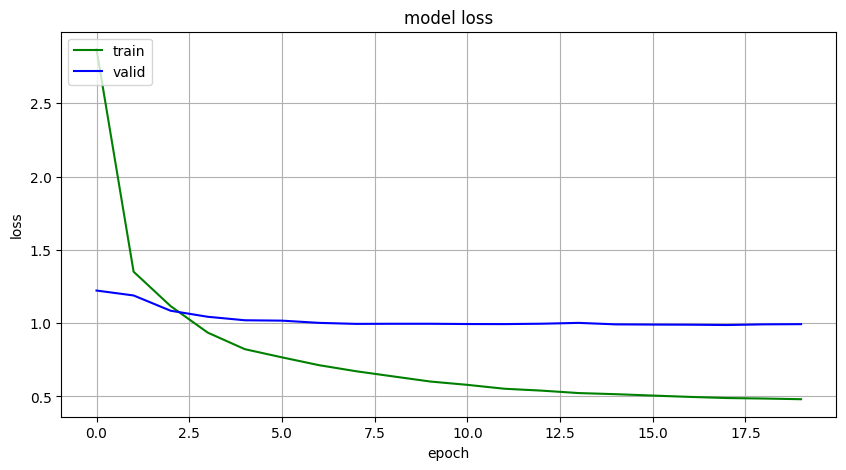

In [31]:
rcParams['figure.figsize'] = 10, 5

plt.plot(history.history['loss'] , 'g')
plt.plot(history.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.grid(True)
plt.show()

Помимо этого, проверим модель на тестовых данных. И после сравним с константной моделью.

In [32]:
# evaluate model
nn_model.evaluate(x=[test_df['user_id'], test_df['movie_id']], y=test_df['rating'])

156/156 [==============================] - 0s 1ms/step - loss: 0.9874


0.9873958230018616

In [ ]:
# constant model
constant_model = np.full_like(test_df['rating'], train_df['rating'].mean())

print(f'Constant model MSE: {mean_squared_error(test_df["rating"], constant_model)}')

Вывод и сравнение

In [ ]:
# save model
nn_model.save('models/nn_model_17M_10-05-2023.h5')

## Создание рекомендаций на основе эмбеддингов

Достанем веса из обученной модели. Запишем веса эмбеддингов пользователей и фильмов в отдельные переменные.

In [33]:
user_embeddings = nn_model.get_layer('user_embedding').get_weights()[0]
movie_embeddings = nn_model.get_layer('movie_embedding').get_weights()[0]

Сохраним эмбеддинги в файлы. Чтобы потом их можно было использовать без необходимости обучать модель заново.

In [ ]:
# save embeddings
np.save('embeddings/user_embeddings.npy', user_embeddings)
np.save('embeddings/movie_embeddings.npy', movie_embeddings)

In [ ]:
# load embeddings
# user_embeddings = np.load('embeddings/user_embeddings.npy')
# movie_embeddings = np.load('embeddings/movie_embeddings.npy')

Реализуем простой пример, как можно применить эмбеддинги для рекомендаций. Для этого возьмем `user_id` пользователя . Достанем его эмбеддинг. Нормализуем эмбеддинги фильмов. Посчитаем скалярное произведение эмбеддинга пользователя и эмбеддингов фильмов. И выберем топ 10 фильмов с наибольшими значениями скалярного произведения.

In [ ]:
# define function to make recommendations
def make_recommendations(user_id: int, n_movies: int = 10) -> np.ndarray:
    """
    Make movie recommendations for user_id
    :param user_id: id of user to make recommendations. Starts at 1 (user_id - 1)
    :param n_movies: count of movies to recommend. Default 10
    :return: top n_movies ids
    """
    user_embedding = user_embeddings[user_id-1]

    movie_embeddings_norm = movie_embeddings / np.linalg.norm(movie_embeddings, axis = 1).reshape((-1, 1))
    scores = user_embedding.dot(movie_embeddings_norm.T)

    top_movies = np.argpartition(scores, -n_movies)[-n_movies:]

    return top_movies

In [36]:
user_id = 1
top_movies = make_recommendations(user_id)
print(f'Top 10 movies for user {user_id}:')
print(top_movies)

### Создание эмбеддингов для новых пользователей

In [36]:
# make embeddings for new user
new_user = {'user_id': [138494], 'movie_id': [1], 'rating': [5]}
new_user = pd.DataFrame(new_user)

new_user_embedding = nn_model.predict([new_user['user_id'], new_user['movie_id']])